# Analyzing Fandago's Rating System after Hickey's Analysis

In October 2015, a data journalist named Walt Hicy analyzed move ratings data and found strong evidence to suggest that Fandangl's rating system was biased and dishonest ([Fandango](https://www.fandango.com/) is an online movie ratings aggregator). Hoe published his analysis [in this article](https://fivethirtyeight.com/features/fandango-movies-ratings/) - a great piece of data journalism that's totally worth reading.

**Goal** : While Fadango claimed the discrepancy was due to a bug in their website, the goal of this project is to analyze more recent movie ratings data to determine whether ther has been any change in Fandango's rating system after Hickey's analysis.

## Understanding the Data

One of the best ways to figure out whether there has been anay chang ind Fandango's rating system after Hickey's analysis is to compare the system's characteristics previous and after the analysis. Fortunately, we have ready-made data for both these periods of time:

* Walt Hickey made the data he analyzed publicly available on [GitHub](https://github.com/fivethirtyeight/data/tree/master/fandango). We'll use the data he collected to analyze the characteristics of Fandango's rating system previous to his analysis.

* One of Dataquest's team members collected movie ratings data for movies released in 2016 and 2017. The data is publicl[y available on [GitHub](https://github.com/mircealex/Movie_ratings_2016_17) and we'll use it to analze the rating system's characteristics after Hickey's analysis.

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt



In [2]:
fandango_previous = pd.read_html('https://github.com/fivethirtyeight/data/blob/master/fandango/fandango_score_comparison.csv',
                       flavor='html5lib')[0]

fandango_previous.columns

fandango_previous.drop('Unnamed: 0', axis=1, inplace=True)



In [3]:
fandango_after = pd.read_html(
    'https://github.com/mircealex/Movie_ratings_2016_17/blob/master/movie_ratings_16_17.csv',
flavor='html5lib')[0]

fandango_after.columns

fandango_after.drop('Unnamed: 0', axis= 1, inplace=True)

In [4]:
fandango_previous.head(5)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [5]:
fandango_previous.columns

Index(['FILM', 'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic',
       'Metacritic_User', 'IMDB', 'Fandango_Stars', 'Fandango_Ratingvalue',
       'RT_norm', 'RT_user_norm', 'Metacritic_norm', 'Metacritic_user_nom',
       'IMDB_norm', 'RT_norm_round', 'RT_user_norm_round',
       'Metacritic_norm_round', 'Metacritic_user_norm_round',
       'IMDB_norm_round', 'Metacritic_user_vote_count', 'IMDB_user_vote_count',
       'Fandango_votes', 'Fandango_Difference'],
      dtype='object')

In [6]:
f_previous = fandango_previous.copy()[['FILM','Fandango_Stars',
                                'Fandango_Ratingvalue','Fandango_votes', 'Fandango_Difference']]
f_previous.head(4)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5


In [7]:
fandango_after.columns

f_after = fandango_after.copy()[['movie','year','fandango']]

f_after.head(4)

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5


### Are the two samples representative for the population we are trying to describe?

Remember that the goal of this project is to check if fandango ratings has changed since Hickey's article on **Fandango's** ratings bias.
Our population of interest is all Movie ratings on Fandango's website regardless of the year of release.

Since we are trying to find out if the parameters of this population changed since Hickey's analysis, we are interested in sampling the population at two different periods  in time - pre and post Hickey's analysis so we can compare the two states

The data we are working withwas sampled at the momenst we want: one sample was taken previous to the analysis, and the other post Hickey's analysis. We want to describe the population, so we need to make sure that the samples are representative, otherwise we should expect a large sampling error and ultimately, wrong conclusions.

After reading the **ReadMe.Md** section of the repository for the data set of Hickey's analysis, we can see that he use the following sampling criteria:

* The movie must have had at least 30 fans ratings on Fandango's website at the time of sampling (Aug. 24, 2015)
* The movie must have had tickets on sale in 2015

The sampling was clearly not random,  because not every movie had the same chance of being included in the sample - some movies did not have any chance at all ( like those with less than 30 fans ratings or those without tickets on sale in 2015). Additionally , this sample is subject to temporal trends - ie movies in 2015 might have been outstandingly good or bad compared to other years thus decreasing the likelyhood of this sample being representative of the entire population.

The sampling conditions for our other sample ( as found in the README.md) of the data set's repository):

* The movies must have been released in 2016 or later
* The movie must have had a considerable number of votes and reviews ( unclear how many from the README.md or from the data)

This second sample is also subject to temporal trends and it's unlikely to be representative of our population of interest.

Both these authors had certain research questions in mind when they sampled the data, and they used a set of criteria to get a sample that would fit their questions. Their sampling method is called [purposive sampling](https://www.youtube.com/watch?v=CdK7N_kTzHI) or selective sampling. While those samples were enough for their research, they don't seem too useful for us.


# Changing the Goal of our Analysis

At this point,we can either collect new data or change the goal of our analysis. We choose the latter and place some limitations on our initial goal.

Instead of trying to determine whether there has been any change in Fandango's rating system after Hickey's analysis, our new goal is to determine whethere there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. This new goal should also be a fairly good proxy for our initial goal.

# Isolating the Samples We Need

With this new research goal, we have two populations of interest:

1. All Fandango's ratings for popular movies in 2015
2. All Fandango's ratings for popular movies in 2016

We need to be clear abour what counts as popular movies. We'll use Hickey's benchmark of 30 fan ratings and count a movie as popular if it has 30 fan ratings or more on Fandango's website.

Although one of the sampling criteria in our second sample is movie popularity , the sample doesn't provide information about the number of fan ratings. We should be skeptical once more and ask whether this sample is truly representative and contains popular movies ( movies with over 30 fan ratings)

One quick way to check the representativity of this sample is to sample randomly 10 movies from it and then check the number of fan ratings ourselves on Fandango's website. Ideally, at least 8 out of 10 movies have 30 fan ratings or more

In [8]:
f_after.sample(10, random_state=1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


Above we use a value of 1 as the random seed. This is good practice as it suggests that twe aren't trying out various random seeds just to get a favorable sample . As of April 2018, these are the fan ratings we found.

|Movie|Fan_ratings|
|:-|:-|
|Mechanic: Ressurrection|2247|
|Warcraft|7271|
|Max Steel|493|
|Me Before You|5263|
|Fantastic Beasts and Where to Find Them | 13400|
|Cell|17|
|Genius|127|
|Sully|11877|
|A Hologram for the King| 500|
|Captain America: Civil War|35057|

90% of the movies in our sample our popular. This is enough and we move forward with a bit more confidence.

Let's also double check the other data set for popular movies. The documentation states that there are only movies with at least 30 fan ratings, and we will try to double check.

In [9]:
f_previous.columns
sum(f_previous['Fandango_votes']<30)

0

If you explore the two data sets, you'll notice that there movies with a releasing year different from 2015 and 2016. For our purposes, we'll need to isolate only the movies released in 2015 and 2016.

Let's start the Hickey's data set and isolate only movies released in 2015. There's no column for release year, but we should be able to extract it from the strings in the FILM column

In [10]:
f_previous.head(2)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5


In [11]:
f_previous['year']= f_previous['FILM'].str[-5:-1]

f_previous.head(2)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015


In [12]:
f_previous.year.value_counts()

2015    129
2014     17
Name: year, dtype: int64

In [13]:
f_2015 = f_previous[f_previous['year']== '2015'].copy()

f_2015['year'].value_counts()

2015    129
Name: year, dtype: int64

In [14]:
f_after['year'].value_counts()

2016    191
2017     23
Name: year, dtype: int64

In [15]:
f_2016 = f_after[f_after['year'] == 2016].copy()

f_2016['year'].value_counts()

2016    191
Name: year, dtype: int64

# Comparing Distribution Shapes for 2015 and 2016

Our aim is to figure out whether there's any difference between Fandango's ratings for Popular movies in 2015 and 2015. One way to gos about this is to analyze and compare the distributions of movie ratings for the two samples. 

We'll used kernel density estimation plots to compare the shape of the distribution. We'll use the FiveThirtyEight style for the plots

In [16]:
%matplotlib inline

plt.style.use('grayscale')

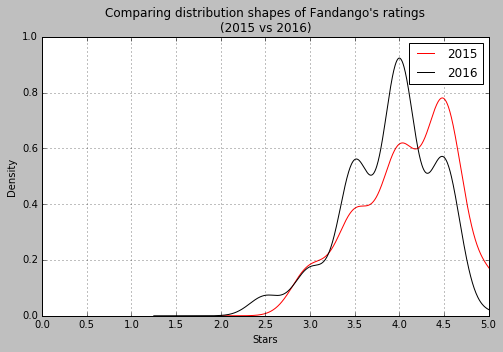

In [20]:
f_2015['Fandango_Stars'].plot.kde(label='2015', legend=True, 
                                  figsize=(8,5), color='red')
f_2016['fandango'].plot.kde(label='2016',legend=True,grid=True)

plt.title(
    'Comparing distribution shapes of Fandango\'s ratings\n(2015 vs 2016)')
plt.xlabel('Stars')
plt.xlim([0,5])  # since ratings start at 0 and  ends at 5
plt.xticks(np.arange(0,5.1,.5))
plt.show()

Two aspects of the figure above are striking:
* Both distributions are strongly left skewed
* The 2016 distribution is slightly shifted to the left relative to the 2015 distribution.

The left skew sugggests that movies on Fandango are given mostly high fan ratings. Coupled with the fact that Fandango sells tickets, the high ratings are a bit dubious. It'd be really interesting to investigate this further - ideally in a separate project , since this is quite irrelevant for the current goal of our analysis.

The slight left shift of the 2016 distribution relative to 2015 is very interesting for our analysis. It shows that ratings were slightly lower in 2016 compared to 2015. This suggests that there was a difference indeed between Fandango's ratings for popular movies in 2015 and 2016. We can alse see the direction of the difference : the ratings in 2016 were slightly lower compared to 2015. 

# Comparing Relative Frequencies

While comparing the distributions with the help of the kernel density plots was a great start, we now need to analyze more granular information.

Let's compare the frequency tables of the two distributions to analyze some numbers. Because the data sets have different numbers of movies, we normalize the tables and show percentages instead.

In [22]:
print('2015'+'\n'+'-'*16) # to help distinguish between tables for 
                            # 2015 and 2016
    
f_2015['Fandango_Stars'].value_counts(normalize=True).sort_index()*100

2015
----------------


3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [23]:
print('2016'+'\n'+'-'*20)
f_2016['fandango'].value_counts(normalize=True).sort_index()*100

2016
--------------------


2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

In 2016, very high ratings( 4.5 and 5 Stars) had significantly lower percentages compared to 2015. In 2016, under 1% of the movies had a perfect rating of 5 stars compared to 2015 when the percentage was closer to 7%. Ratings of 4.5 were also more popular in 2015- there were approximately 13% more movies rated with a 4.5 stars in 2015 compared to 2016.

Additionally, the minimum ratings is also lower in 2016 - 2.5 instea of 3 stars (the minimum of 2015). There is a clear difference between the two frequency distributions. 

For some other ratings, the percentage went up in 2016. There was a greater percentage of movies in 2016 that received 3.5 and 4 stars , compared to 2015. 3.5 and 4.0 are high ratings this challenges the direction of change we saw on the kernel density estimate plot.

# Determining the Direction of Change

We confirmed with the two tables that there is indeed a clear difference between the two distributions. However the direction of the difference is not as clear as it was on the Kernel density plot.

We'll take a couple of summary statistics to get a more precise picture about the direction of difference.

We'll take each distribution of movie ratings and compute its mean, median and mode and then compare these statistics to determine what they tell about the direction of the difference.

In [25]:
mean_2015 = f_2015.Fandango_Stars.mean()
median_2015 = f_2015.Fandango_Stars.median()
mode_2015 = f_2015.Fandango_Stars.mode()[0]


mean_2016 = f_2016.fandango.mean()
median_2016 = f_2016.fandango.median()
mode_2016 = f_2016.fandango.mode()[0]


In [31]:
summary_statistics = pd.DataFrame(
    {2015:[mean_2015,median_2015,mode_2015],
    2016:[mean_2016,median_2016,mode_2016]},
                    index=['mean','median','mode'])

In [32]:
summary_statistics

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


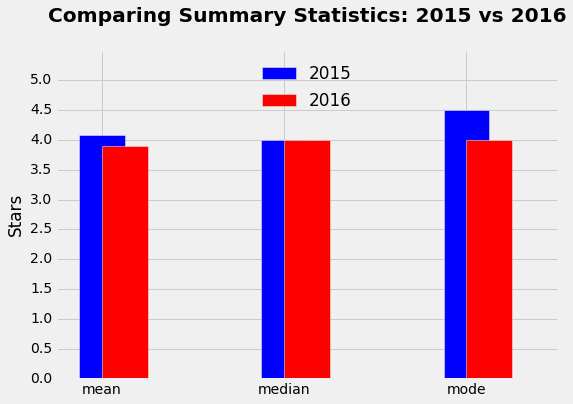

In [51]:
plt.style.use('fivethirtyeight')

summary_statistics[2015].plot.bar(align='center',
                                  figsize=(8,5.5),
                                 legend='2015',color='b',
                                 width=.25)

summary_statistics[2016].plot.bar(align='edge',
                                 legend='2016',color='r',
                                 rot=0,width=.25)
plt.legend(loc='upper center',framealpha=0)
plt.yticks(np.arange(0,5.1,.5))
plt.ylim([0,5.5])
plt.ylabel('Stars')
plt.title(
    'Comparing Summary Statistics: 2015 vs 2016',
    fontweight='bold',y=1.07)

The mean rating was lower in 2016 with approximately 0.2. This means a drop of almost 5% relative to mean for 2015.

In [62]:
(summary_statistics[2015][0]
- summary_statistics[2016][0])/summary_statistics[2015][0]

0.04842683568951993

While the median is thesame for both distributions, the mode is lower in 2016 by 0.5. 

If we examine this result in tandem with what we saw for the mean , the direction of the change we saw on the kernel Density plot is confirmed: on average, popular movies released in 2016 were rated slightly lower than popular movies released in 2015.

# Conclusion

Our analysis showed that there's indeed a slight difference between Fandango's ratings for popular movies in 2015 and 2016. We also determined that, on average, popular movies released in 2016 were related lower on Fandango than popular movies released in 2016.

We cannot be completely sure what caused the change, but there is a likelyhood that Fandango fixing the biased rating system after Hickey's analysis may be responsible for this.